# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as style
from scipy import stats

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data = pd.read_csv('../data/Wholesale_customers_data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

#### Checking data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Checking Missing data

In [6]:
# Your observations here
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### Checking categorical variables

In [7]:
data.Region.unique()

array([3, 1, 2])

In [8]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [9]:
data.Channel.unique()

array([2, 1])

In [10]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

#### Descriptive statistics check

In [11]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Checking correlations between the numerical variables

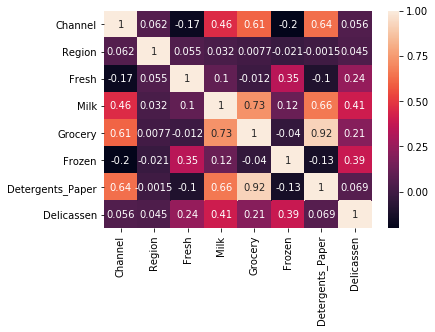

In [12]:
sns.heatmap(data.corr(), annot=True)

### Checking for multicolinearity

In [13]:
from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

In [14]:
qt_data = data.iloc[:,2:]

In [15]:
X = add_constant(qt_data)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
mc_check

const               2.780578
Fresh               1.184165
Milk                2.549436
Grocery             8.794815
Frozen              1.318218
Detergents_Paper    8.104138
Delicassen          1.520539
dtype: float64

##### Comment here

Since the variance inflation factor of Grocery and Detergent_Paper are above 5,  we decide to drop one of them which in this case will be Detergent_Papar but only at the data frame without outliers that will be create later at the beginning of challenge 2.

#### Checking distributions and relations between the numerical variables

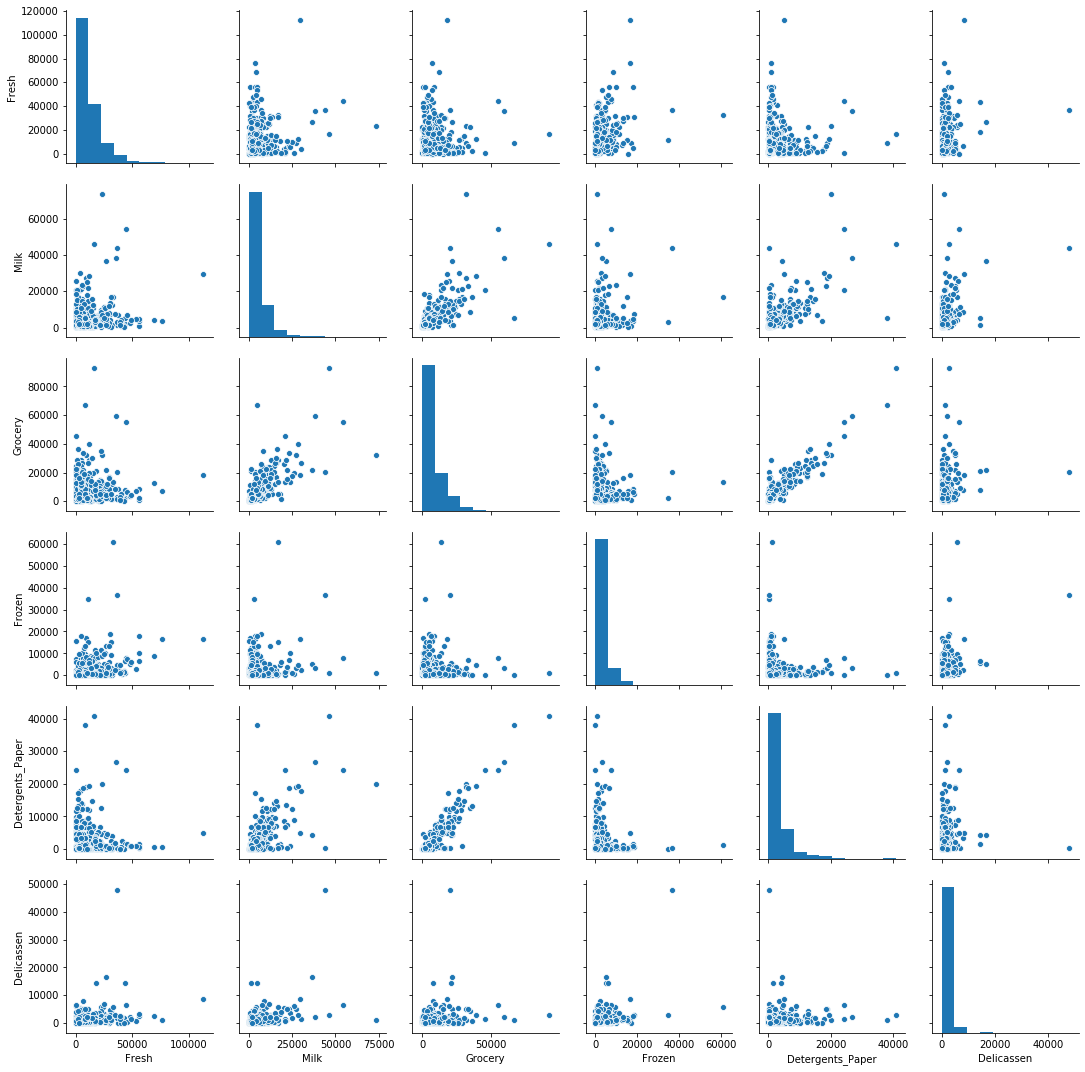

In [17]:
sns.pairplot(data.iloc[:,2:,])

In [18]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [19]:
style.use('ggplot')

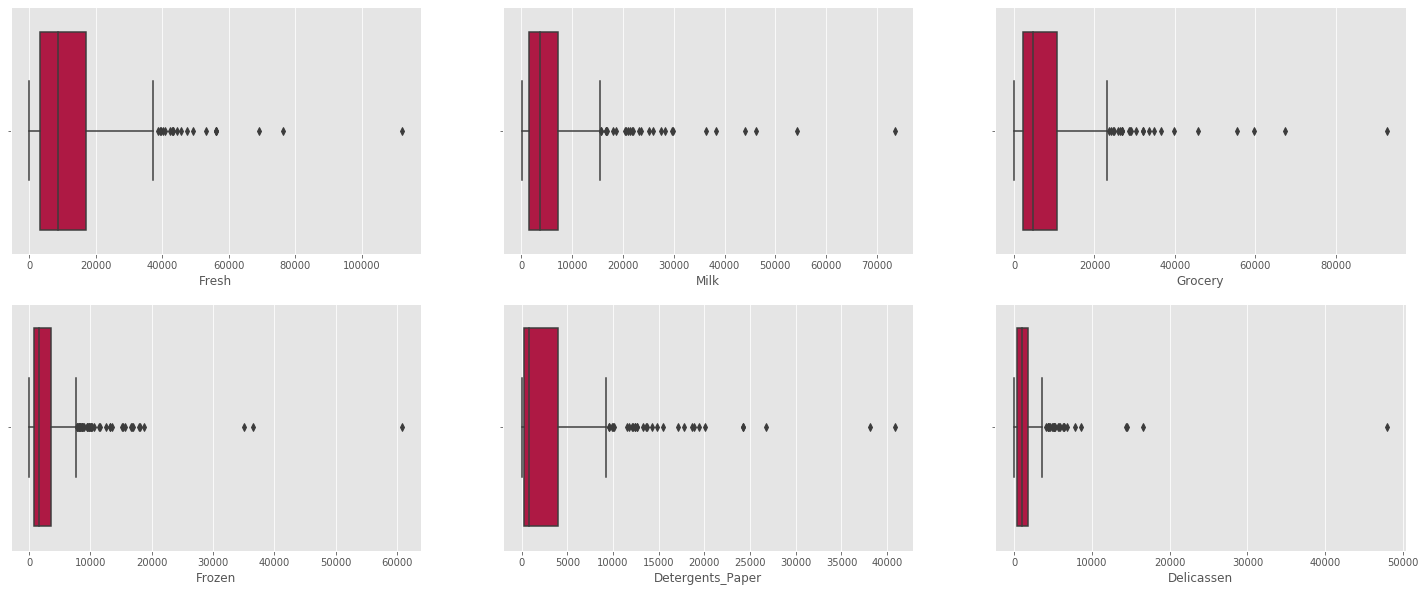

In [20]:
fig, [ax1,ax2] = plt.subplots(2,3,figsize=(25,10))

lista = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

for i in range(3):
    sns.boxplot(data[lista[0+i]], ax=ax1[i], color='#C70039')
    sns.boxplot(data[lista[3+i]],ax=ax2[i],color='#C70039')

In [21]:
data_chanell = data.Channel.value_counts().to_frame().reset_index(drop=False)

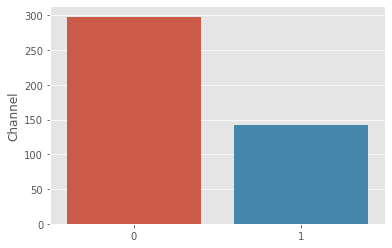

In [22]:
sns.barplot(data_chanell.index, data_chanell.Channel)

In [23]:
data_region = data.Region.value_counts().to_frame().reset_index(drop=False)

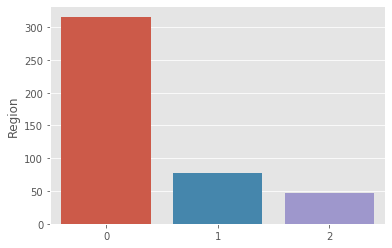

In [24]:
sns.barplot(data_region.index, data_region.Region)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

### Making two dataframes, one with outliers and one without outliers and without colinearity to compare them afterwards

In [25]:
# Your code here
z = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z > 3))

(array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413]), array([3, 7, 2, 3, 4, 6, 3, 6, 3, 4, 6, 4, 6, 7, 3, 4, 6, 3, 6, 7, 6, 5,
       2, 5, 2, 2, 3, 3, 5, 7, 5, 3, 4, 6, 4, 6, 2, 2, 2, 5, 4, 6, 5]))


In [26]:
#The first array contains the list of row numbers and second array respective column numbers
#So in this case, we decided to drop the rows containing outliers

In [27]:
data_no_outliers = data.drop([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413])

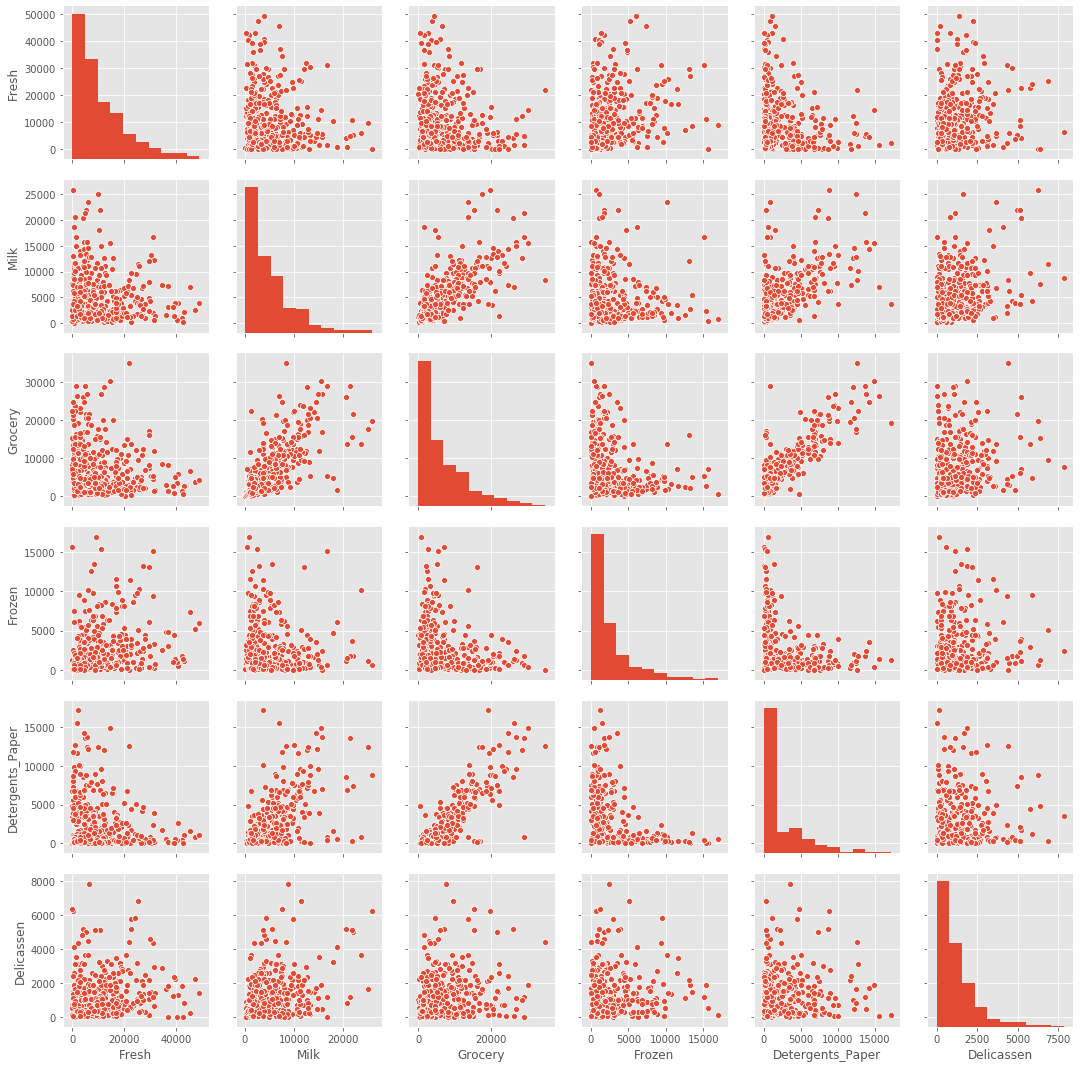

In [28]:
sns.pairplot(data_no_outliers.iloc[:,2:,])

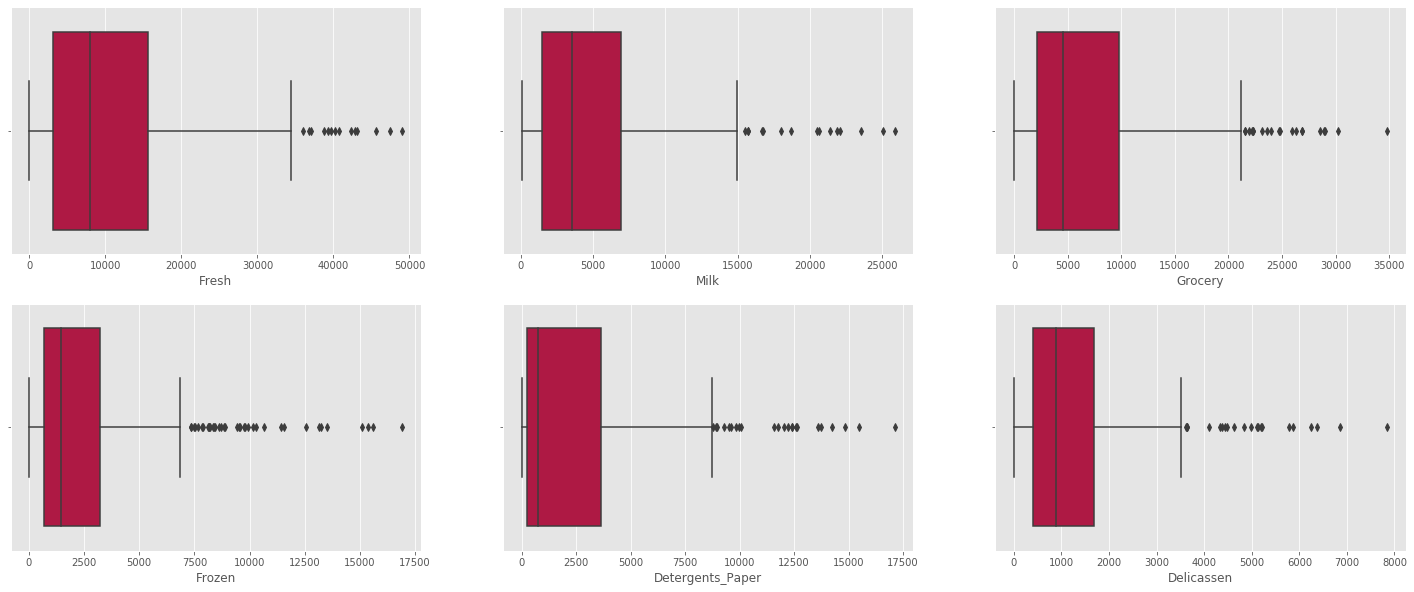

In [29]:
fig, [ax1,ax2] = plt.subplots(2,3,figsize=(25,10))

lista = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

for i in range(3):
    sns.boxplot(data_no_outliers[lista[0+i]], ax=ax1[i], color='#C70039')
    sns.boxplot(data_no_outliers[lista[3+i]],ax=ax2[i],color='#C70039')

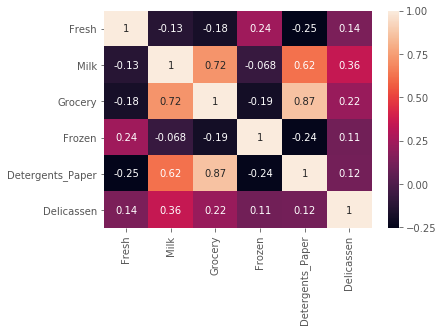

In [30]:
sns.heatmap(data_no_outliers.iloc[:,2:].corr(), annot=True)

In [31]:
X = add_constant(data_no_outliers.iloc[:,2:])

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const               4.785828
Fresh               1.144332
Milk                2.301105
Grocery             5.227172
Frozen              1.122100
Detergents_Paper    4.323218
Delicassen          1.224565
dtype: float64


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Revoming Grocery

In [32]:
data_no_outliers = data_no_outliers.drop(['Grocery'], axis=1)

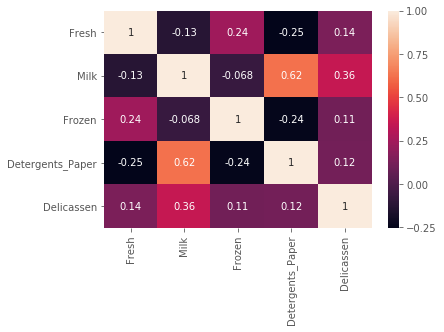

In [33]:
sns.heatmap(data_no_outliers.iloc[:,2:].corr(), annot=True)

In [34]:
X = add_constant(data_no_outliers.iloc[:,2:])

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const               4.608734
Fresh               1.139479
Milk                1.896209
Frozen              1.120611
Detergents_Paper    1.816647
Delicassen          1.215104
dtype: float64


In [35]:
data_clean = data_no_outliers.copy()

In [36]:
data_clean_cat = data_clean.iloc[:,0:2]

In [37]:
data_clean.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,214,2674,1338
1,2,3,7057,9810,1762,3293,1776
2,2,3,6353,8808,2405,3516,7844
3,1,3,13265,1196,6404,507,1788
4,2,3,22615,5410,3915,1777,5185


In [38]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 439
Data columns (total 7 columns):
Channel             414 non-null int64
Region              414 non-null int64
Fresh               414 non-null int64
Milk                414 non-null int64
Frozen              414 non-null int64
Detergents_Paper    414 non-null int64
Delicassen          414 non-null int64
dtypes: int64(7)
memory usage: 25.9 KB


In [39]:
# Your comment here






# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [40]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
scaler.fit(data_clean.iloc[:,2:])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
print(scaler.mean_)

[10711.75845411  4871.92028986  2549.89855072  2373.39371981
  1237.93961353]


In [42]:
customers_scale = scaler.transform(data_clean.iloc[:,2:])

In [43]:
customers_scale = pd.DataFrame(customers_scale)

In [44]:
customers_scale.columns = ['Fresh', 'Milk', 'Frozen',
       'Detergents_Paper', 'Delicassen']

In [45]:
customers_scale.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,0.199569,1.051409,-0.801844,0.093798,0.082291
1,-0.372655,1.085254,-0.270462,0.286944,0.442510
2,-0.444438,0.865042,-0.049739,0.356526,5.432937
3,0.260340,-0.807866,1.322997,-0.582369,0.452379
4,1.213706,0.118255,0.468598,-0.186092,3.246130


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

##### Previous step: Hierarchical clustering to understand in how many cluster we can divide our data.

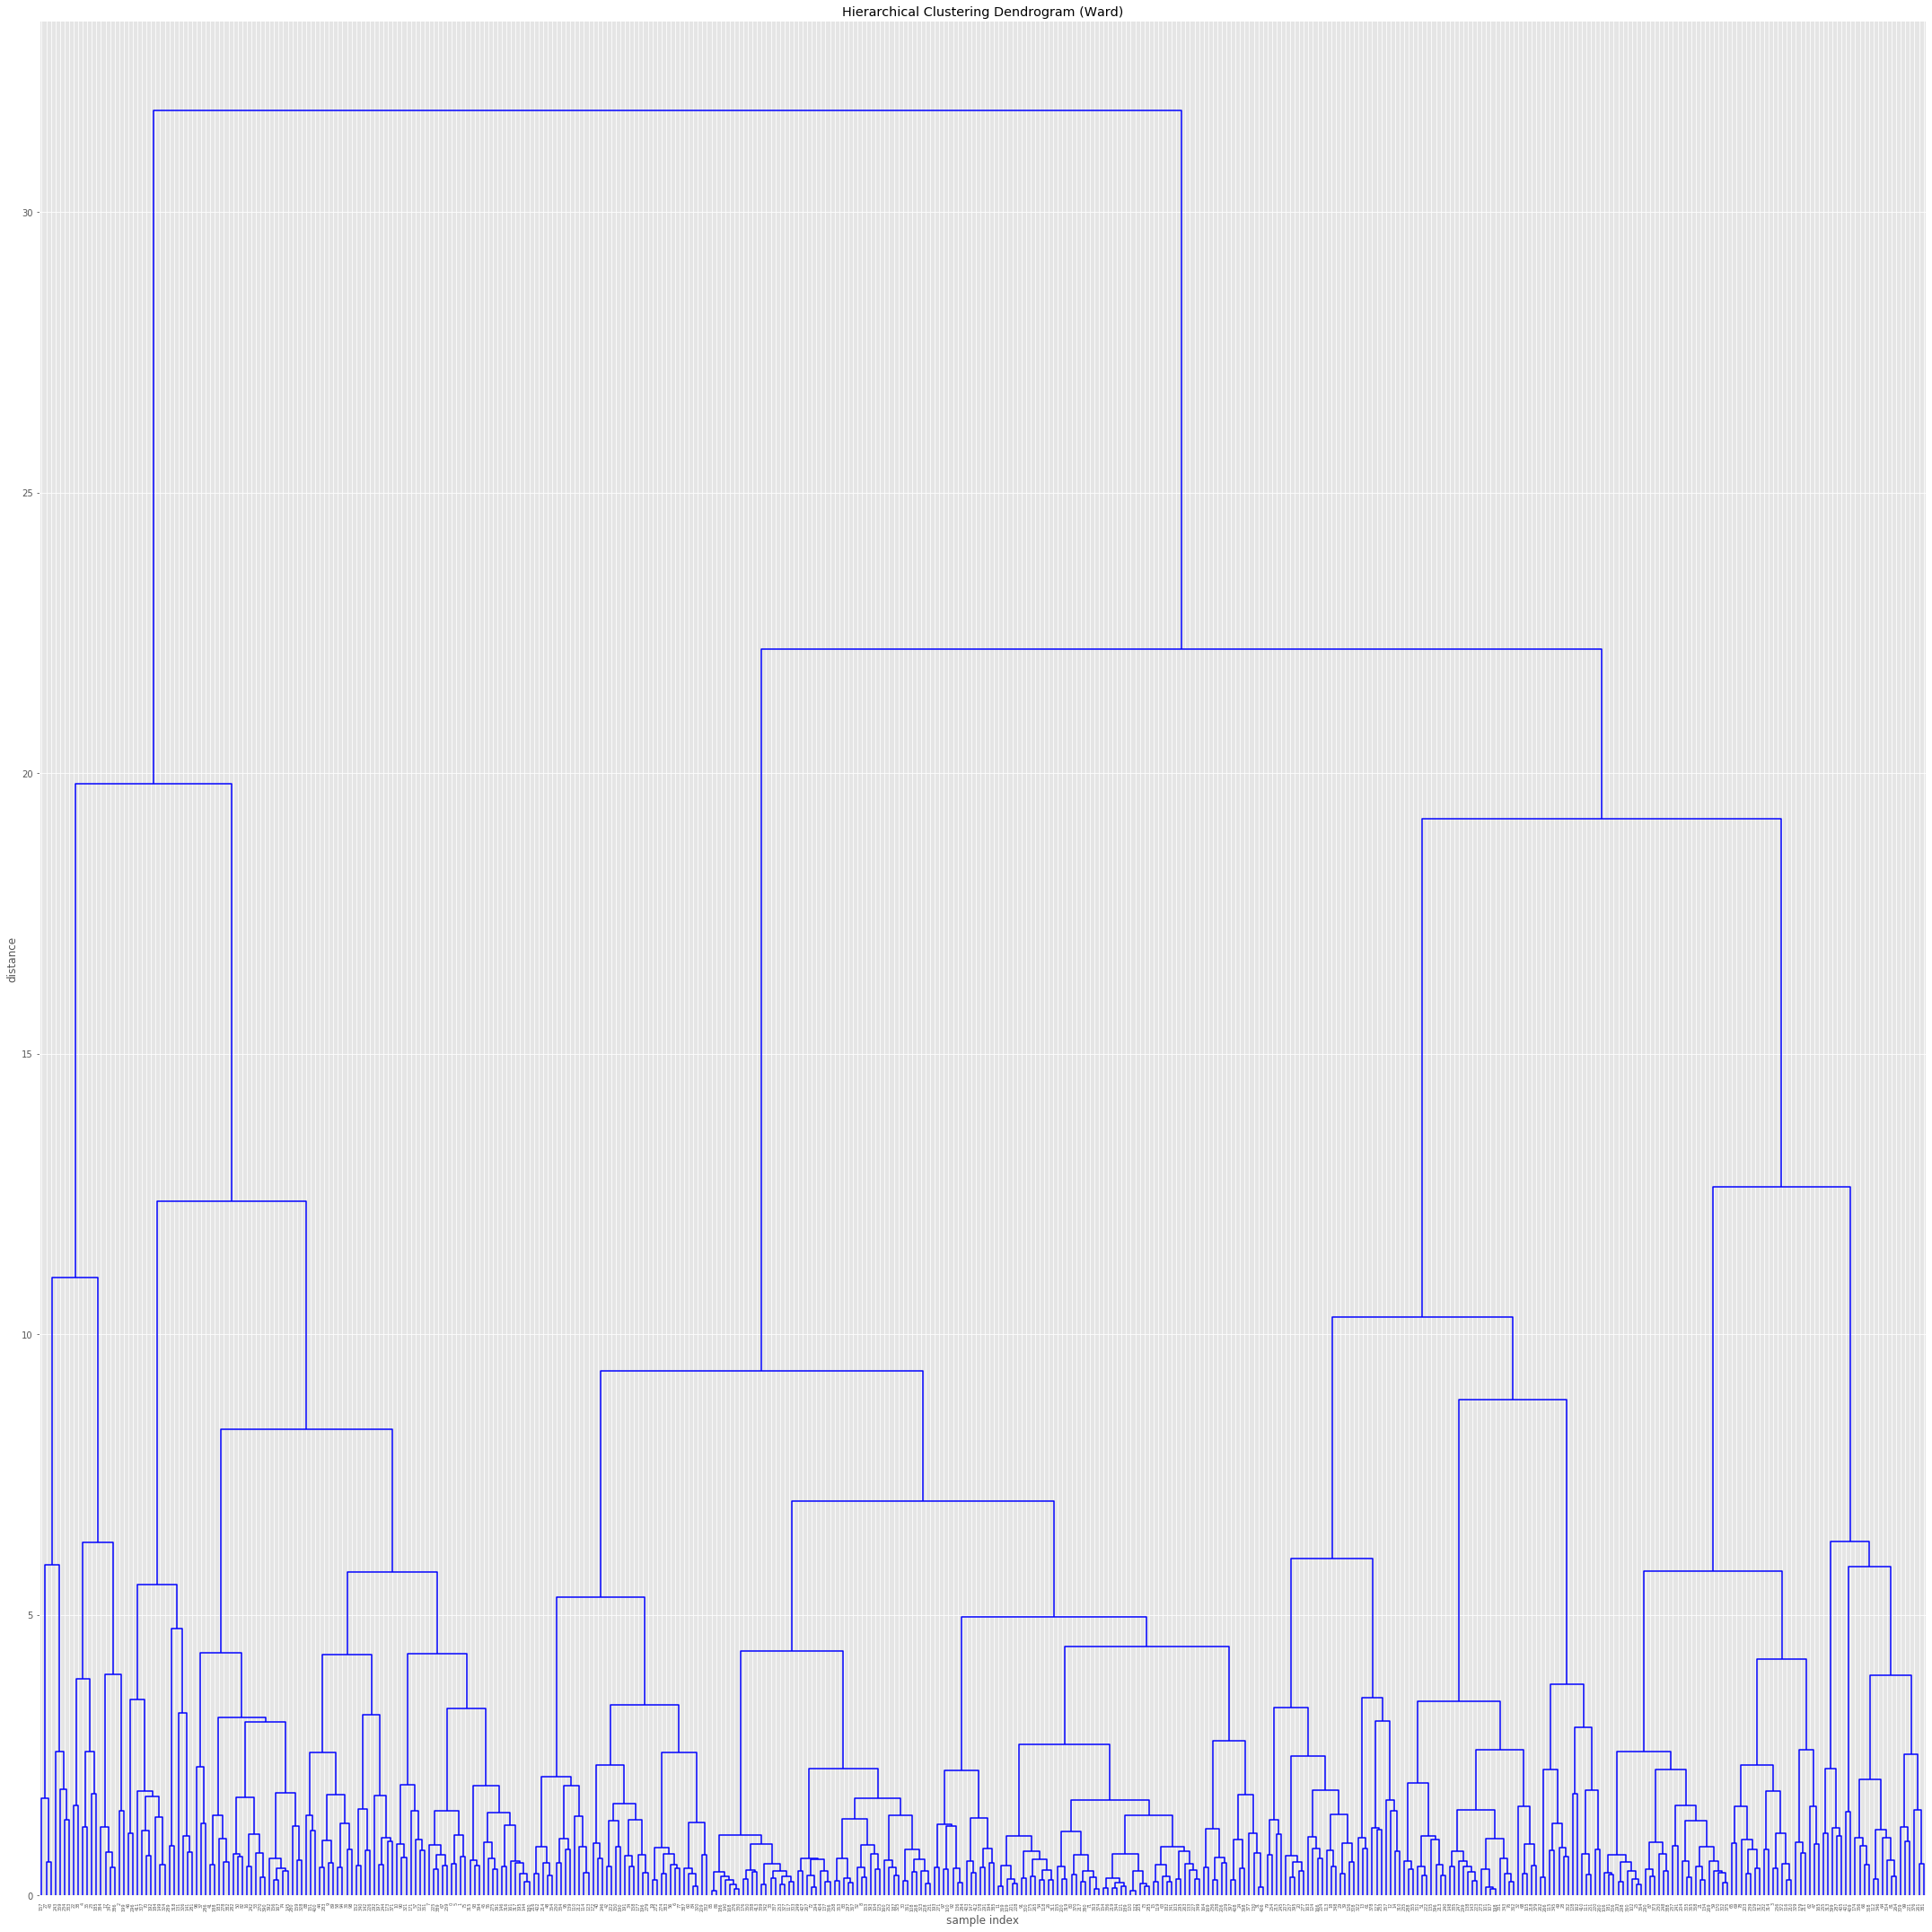

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customers_scale, 'ward')
figure = plt.figure(figsize=(30, 30))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

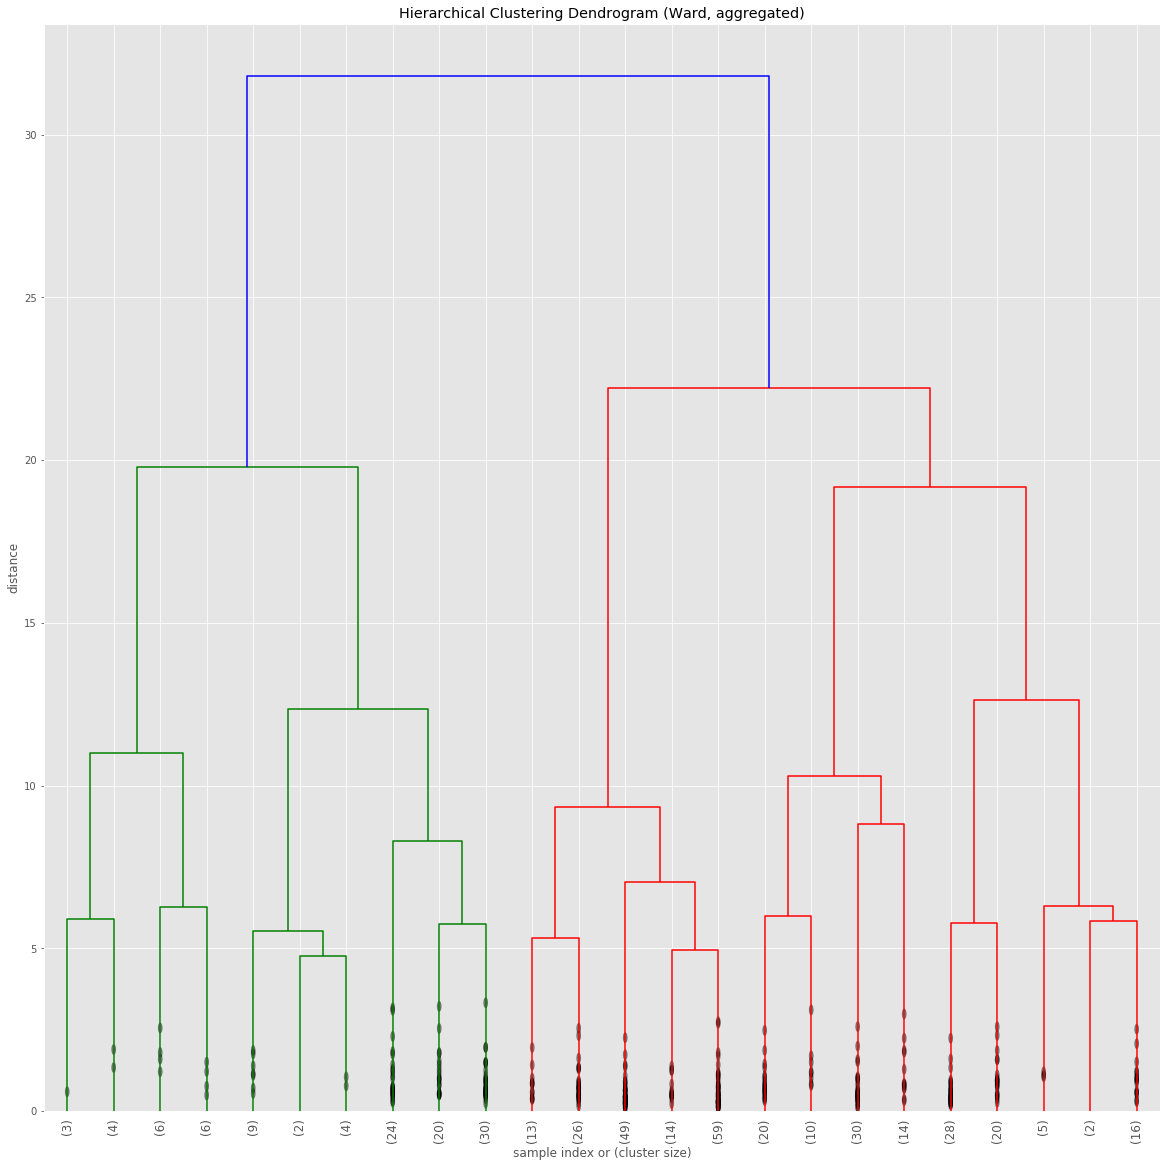

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customers_scale, 'ward')
figure = plt.figure(figsize=(20, 20))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [48]:
# Your code here:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(customers_scale)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
customers_scale['cluster'] = kmeans_model.labels_

In [50]:
customers_scale.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster
0,0.199569,1.051409,-0.801844,0.093798,0.082291,3
1,-0.372655,1.085254,-0.270462,0.286944,0.442510,3
2,-0.444438,0.865042,-0.049739,0.356526,5.432937,1
3,0.260340,-0.807866,1.322997,-0.582369,0.452379,4
4,1.213706,0.118255,0.468598,-0.186092,3.246130,1


Count the values in `labels`.

In [51]:
# Your code here:
customers_scale.cluster.value_counts()

0    185
3     95
2     71
4     43
1     20
Name: cluster, dtype: int64

In [52]:
data_cluster = customers_scale.cluster.value_counts().to_frame()

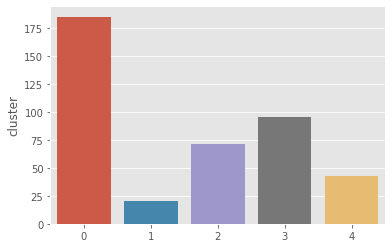

In [53]:
sns.barplot(data_cluster.index, data_cluster.cluster)

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [54]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5)
dbscan_model.fit(customers_scale.iloc[:,:-1])


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [55]:
customers_scale['labels_DBSCAN'] = dbscan_model.labels_

In [56]:
customers_scale.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster,labels_DBSCAN
0,0.199569,1.051409,-0.801844,0.093798,0.082291,3,-1
1,-0.372655,1.085254,-0.270462,0.286944,0.442510,3,-1
2,-0.444438,0.865042,-0.049739,0.356526,5.432937,1,-1
3,0.260340,-0.807866,1.322997,-0.582369,0.452379,4,-1
4,1.213706,0.118255,0.468598,-0.186092,3.246130,1,-1


Count the values in `labels_DBSCAN`.

In [57]:
# Your code here
customers_scale.labels_DBSCAN.value_counts()

-1    254
 0    148
 1      7
 2      5
Name: labels_DBSCAN, dtype: int64

In [58]:
data_dbscan = customers_scale.labels_DBSCAN.value_counts().to_frame()

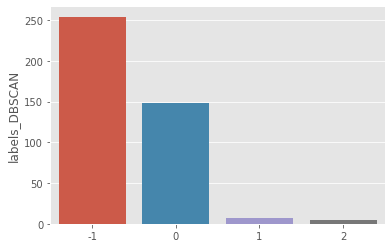

In [59]:
sns.barplot(data_dbscan.index, data_dbscan.labels_DBSCAN)

In [60]:
customers_scale.isna().sum()

Fresh               0
Milk                0
Frozen              0
Detergents_Paper    0
Delicassen          0
cluster             0
labels_DBSCAN       0
dtype: int64

In [61]:
customers_scale.labels_DBSCAN.value_counts()

-1    254
 0    148
 1      7
 2      5
Name: labels_DBSCAN, dtype: int64

#### Indexing the results of both clusters into my data not stardarized

In [62]:
data_clean['Cluster'] = kmeans_model.labels_
data_clean['labels_DBSCAN'] = dbscan_model.labels_

In [63]:
data_clean.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Cluster,labels_DBSCAN
0,2,3,12669,9656,214,2674,1338,3,-1
1,2,3,7057,9810,1762,3293,1776,3,-1
2,2,3,6353,8808,2405,3516,7844,1,-1
3,1,3,13265,1196,6404,507,1788,4,-1
4,2,3,22615,5410,3915,1777,5185,1,-1


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

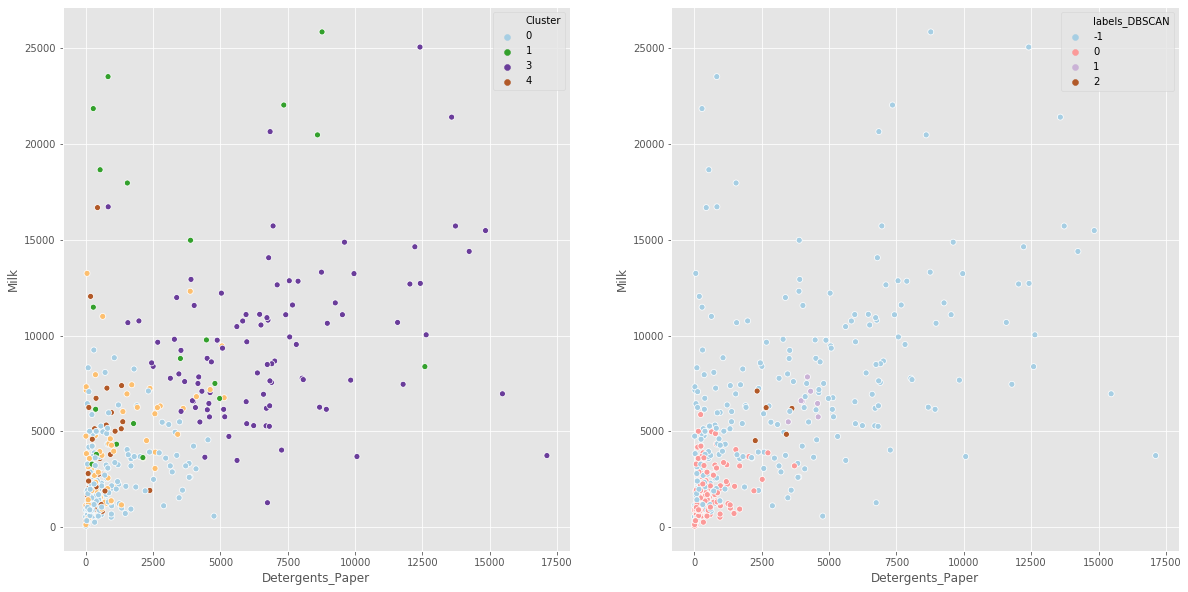

In [64]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data_clean.Detergents_Paper, data_clean.Milk,hue= data_clean.Cluster, ax=ax[0], palette="Paired")
sns.scatterplot(data_clean.Detergents_Paper, data_clean.Milk,hue= data_clean.labels_DBSCAN, ax=ax[1], palette="Paired")


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

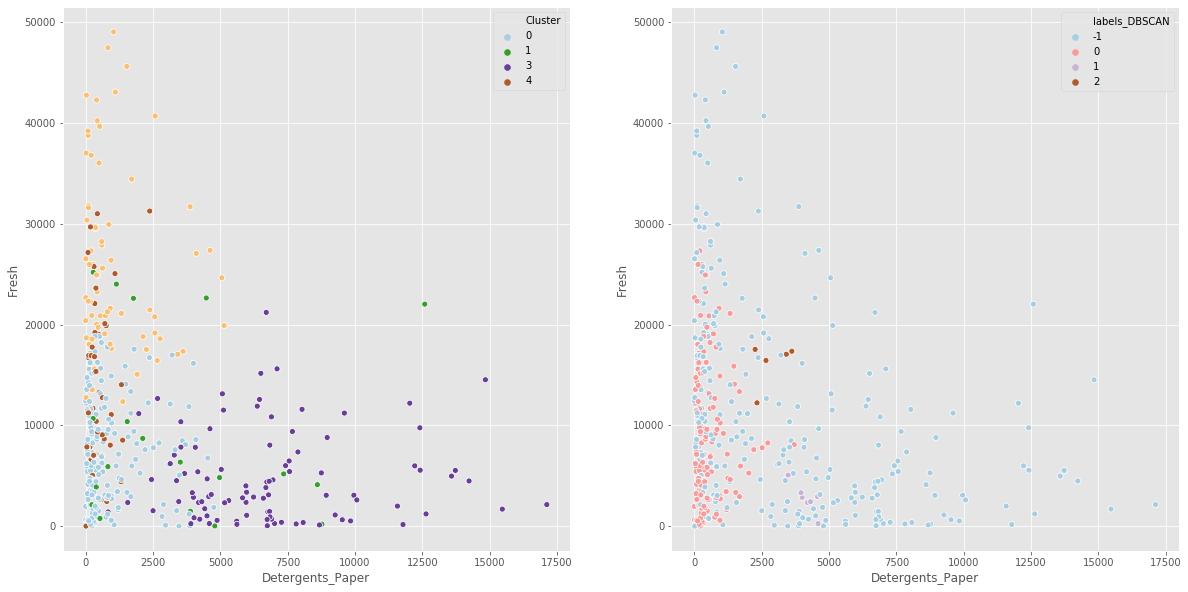

In [65]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data_clean.Detergents_Paper, data_clean.Fresh,hue= data_clean.Cluster, ax=ax[0], palette="Paired")
sns.scatterplot(data_clean.Detergents_Paper, data_clean.Fresh,hue= data_clean.labels_DBSCAN, ax=ax[1], palette="Paired")




Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

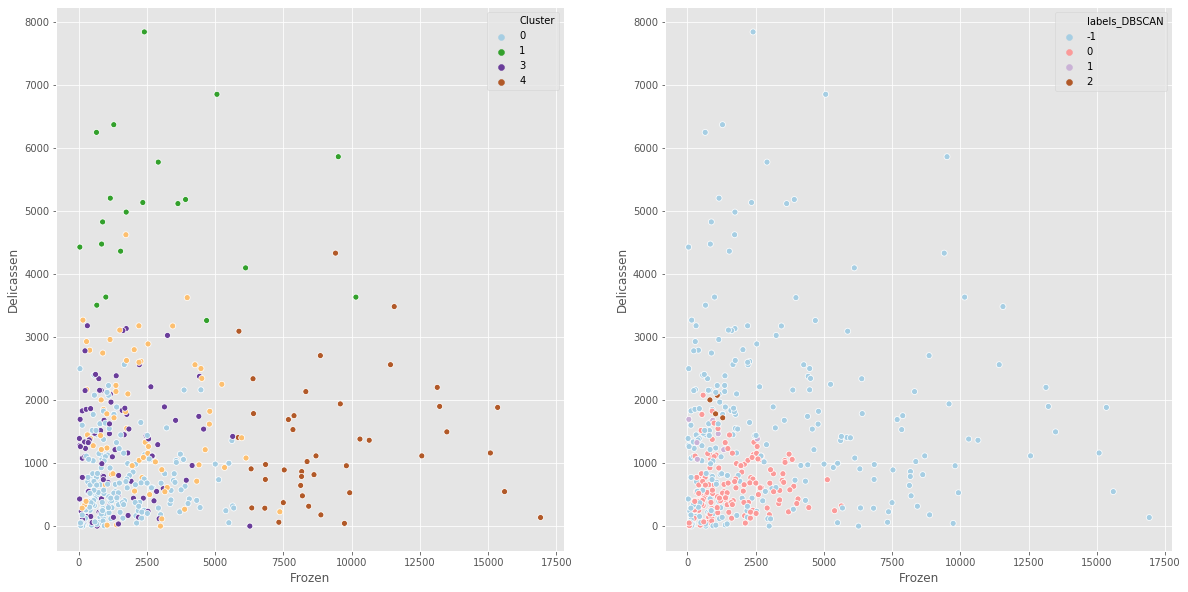

In [66]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data_clean.Frozen, data_clean.Delicassen,hue= data_clean.Cluster, ax=ax[0], palette="Paired")
sns.scatterplot(data_clean.Frozen, data_clean.Delicassen,hue= data_clean.labels_DBSCAN, ax=ax[1], palette="Paired")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [67]:
# Your code here:
data_clean.groupby('Cluster').mean()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Cluster,,,,,,,,
0,1.097297,2.545946,7159.470270,2412.383784,1588.951351,859.470270,718.248649,-0.254054
1,1.500000,2.550000,9350.950000,12234.800000,3026.500000,3425.300000,5042.150000,-1.000000
2,1.211268,2.563380,26236.985915,3868.450704,2264.338028,1098.774648,1576.633803,-0.619718
3,1.884211,2.547368,4814.421053,9455.315789,1435.821053,6893.389474,1163.357895,-0.873684
4,1.069767,2.534884,14022.116279,3559.837209,9395.372093,516.093023,1309.953488,-1.000000


In [68]:
data_clean.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Cluster
labels_DBSCAN,,,,,,,,
-1,1.460630,2.547244,12008.196850,6608.661417,3149.787402,3407.988189,1563.299213,2.216535
0,1.027027,2.547297,8680.614865,1781.270270,1645.898649,496.918919,647.817568,0.202703
1,1.571429,2.428571,2742.857143,6547.142857,958.857143,4161.142857,1405.571429,2.571429
2,2.000000,2.800000,16131.000000,5783.400000,1061.400000,2856.800000,1942.600000,1.600000


Which algorithm appears to perform better?

# Your observations here


1- Why we are not seeing cluster number 2 in the scatter plots?


2- What happend in DBSCAN with the outliers? does it group them all together in a single group?


3- When grouping by labels_DBSCAN, how is it possible to have in the Cluster column the values that we got?




# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [69]:
cust_scale_2 = customers_scale.copy()

In [70]:
cust_scale_2.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster,labels_DBSCAN
0,0.199569,1.051409,-0.801844,0.093798,0.082291,3,-1
1,-0.372655,1.085254,-0.270462,0.286944,0.442510,3,-1
2,-0.444438,0.865042,-0.049739,0.356526,5.432937,1,-1
3,0.260340,-0.807866,1.322997,-0.582369,0.452379,4,-1
4,1.213706,0.118255,0.468598,-0.186092,3.246130,1,-1


In [71]:
# Your code here
kmeans_model_6 = KMeans(n_clusters=6)
kmeans_model_6.fit(cust_scale_2)
cust_scale_2['cluster_6'] = kmeans_model_6.labels_

In [72]:
cust_scale_2.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster,labels_DBSCAN,cluster_6
0,0.199569,1.051409,-0.801844,0.093798,0.082291,3,-1,0
1,-0.372655,1.085254,-0.270462,0.286944,0.442510,3,-1,0
2,-0.444438,0.865042,-0.049739,0.356526,5.432937,1,-1,3
3,0.260340,-0.807866,1.322997,-0.582369,0.452379,4,-1,2
4,1.213706,0.118255,0.468598,-0.186092,3.246130,1,-1,3


### Comparison between cluster 5 and cluster 6

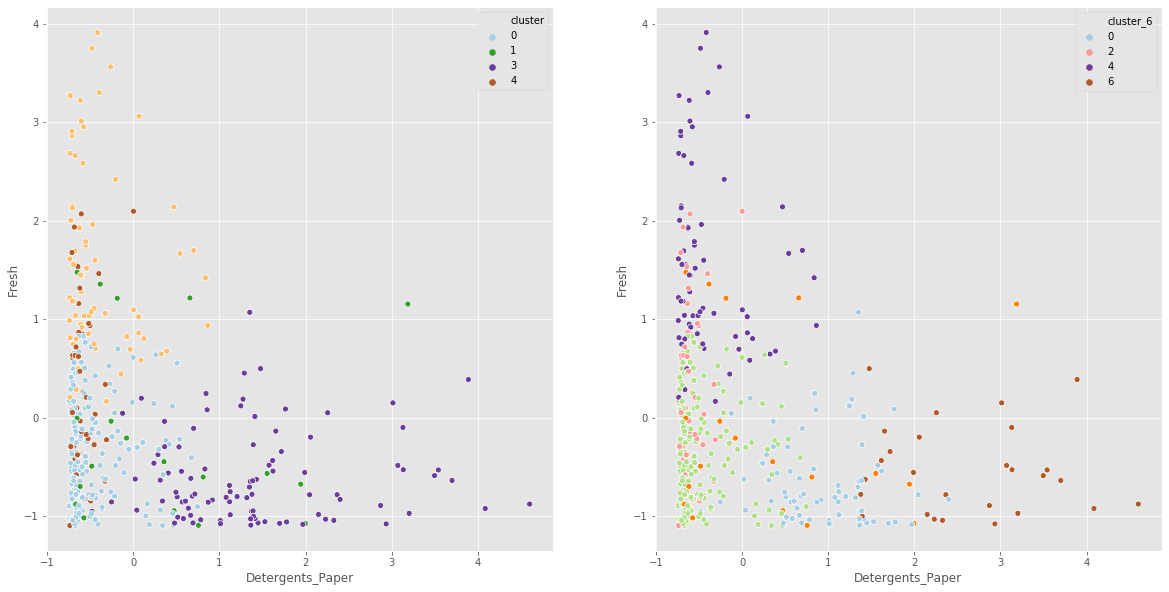

In [73]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(cust_scale_2.Detergents_Paper, cust_scale_2.Fresh,hue= cust_scale_2.cluster, ax=ax[0], palette="Paired")
sns.scatterplot(cust_scale_2.Detergents_Paper, cust_scale_2.Fresh,hue= cust_scale_2.cluster_6, ax=ax[1], palette="Paired")


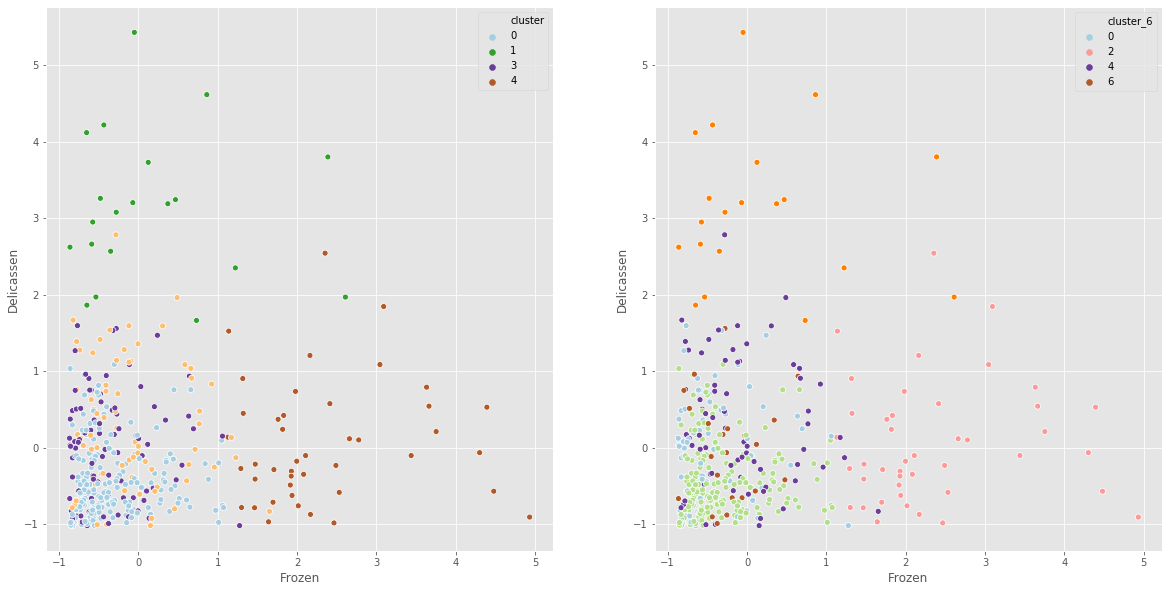

In [74]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(cust_scale_2.Frozen, cust_scale_2.Delicassen,hue= cust_scale_2.cluster, ax=ax[0], palette="Paired")
sns.scatterplot(cust_scale_2.Frozen, cust_scale_2.Delicassen,hue= cust_scale_2.cluster_6, ax=ax[1], palette="Paired")


In [75]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [76]:
cust_scale_2.head(2)

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster,labels_DBSCAN,cluster_6
0,0.199569,1.051409,-0.801844,0.093798,0.082291,3,-1,0
1,-0.372655,1.085254,-0.270462,0.286944,0.442510,3,-1,0


In [77]:
# Your code here

dbscan_model_8 = DBSCAN(eps=0.8)
dbscan_model_8.fit(cust_scale_2.iloc[:,:-3])
cust_scale_2['labels_DBSCAN_8'] = dbscan_model_8.labels_


In [78]:
dbscan_model_10 = DBSCAN(eps=1)
dbscan_model_10.fit(cust_scale_2.iloc[:,:-4])
cust_scale_2['labels_DBSCAN_10'] = dbscan_model_10.labels_


Text(0.5, 0, 'Frozen')

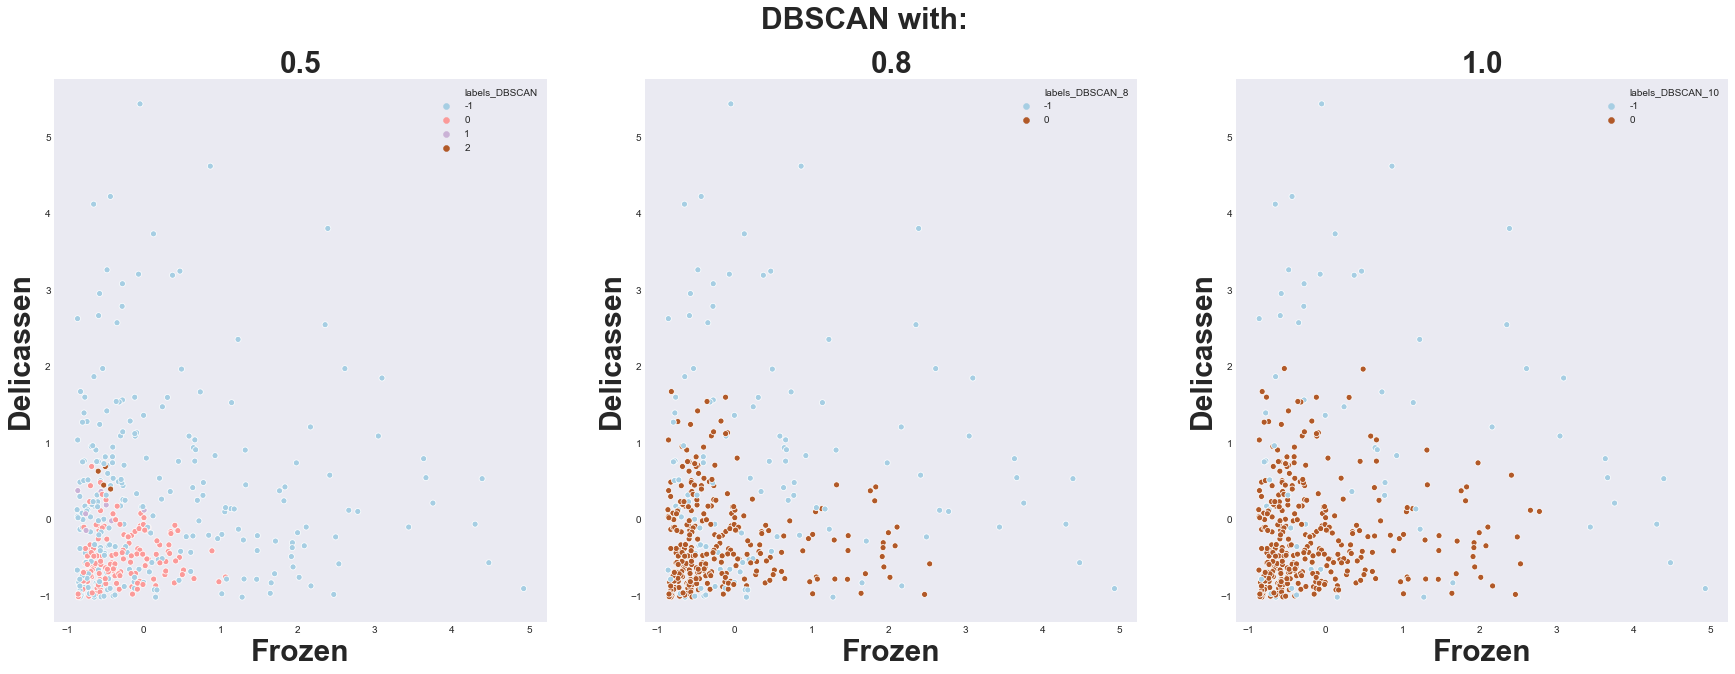

In [79]:
# Your code here:
style.use('seaborn-dark')

fig, ax = plt.subplots(1,3,figsize=(30,10))
plt.suptitle('DBSCAN with:',fontweight = 900, fontsize = 30)

sns.scatterplot(cust_scale_2.Frozen, cust_scale_2.Delicassen,hue= cust_scale_2.labels_DBSCAN, ax=ax[0], \
                                                                                        palette="Paired")
sns.scatterplot(cust_scale_2.Frozen, cust_scale_2.Delicassen,hue= cust_scale_2.labels_DBSCAN_8, ax=ax[1],\
                                                                                        palette="Paired")
sns.scatterplot(cust_scale_2.Frozen, cust_scale_2.Delicassen,hue= cust_scale_2.labels_DBSCAN_10, ax=ax[2],\
                                                                                        palette="Paired")

ax[0].set_title('0.5', fontweight = 900,fontsize = 30)
ax[1].set_title('0.8', fontweight = 900,fontsize = 30)
ax[2].set_title('1.0', fontweight = 900,fontsize = 30)

ax[0].set_ylabel('Delicassen',fontweight = 900,fontsize = 30)
ax[1].set_ylabel('Delicassen',fontweight = 900,fontsize = 30)
ax[2].set_ylabel('Delicassen',fontweight = 900,fontsize = 30)

ax[0].set_xlabel('Frozen',fontweight = 900,fontsize = 30)
ax[1].set_xlabel('Frozen',fontweight = 900,fontsize = 30)
ax[2].set_xlabel('Frozen',fontweight = 900,fontsize = 30)

In [81]:
kmeans_model.inertia_

851.9915128352092

In [82]:
kmeans_model_6.inertia_

877.595187390956

In [ ]:
# Your comment here